In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

data_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/data/'
code_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/'
well_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/data/wells/'
model_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/models/'
plot_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/plots/'
# data = pd.read_csv(data_dir + '01_well_data.csv')
# raw_paths, lbls = data['img_paths'], data['labels']

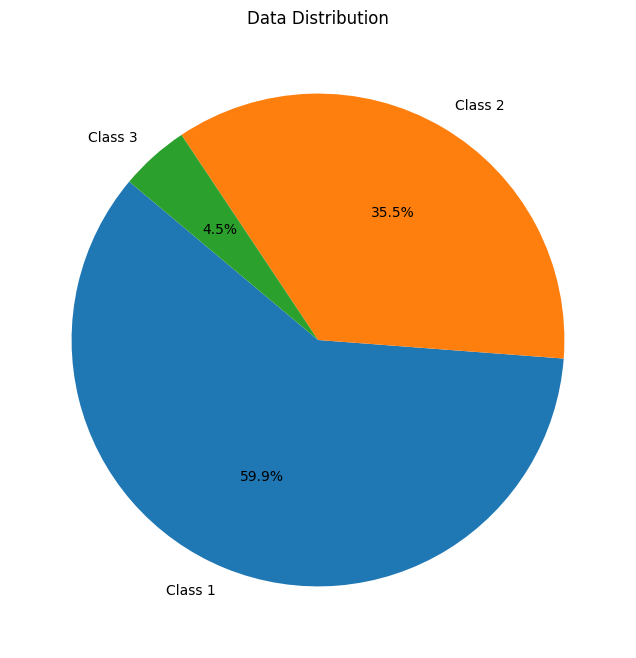

In [ ]:
data = pd.read_csv(data_dir + '01_well_data.csv')
raw_paths, lbls = data['img_paths'], data['labels']
name_lbls = {}
x, y = [], []
for i in range(len(raw_paths)):
  img_name = raw_paths[i].split('/')[-2] + '/' + raw_paths[i].split('/')[-1]
  lbl = int(lbls[i])
  # img = cv2.imread(well_dir+img_name)
  # img = cv2.resize(img, dsize=(224, 224))
  #img = np.array(load_img(well_dir+img_name, target_size=(224, 224)))
  #x.append(img)
  y.append(lbl)



import matplotlib.pyplot as plt

# Sample data: distribution of three classes
# Replace these values with your actual data
class_distribution = [y.count(0), y.count(1), y.count(2)]
class_labels = ['Class 1', 'Class 2', 'Class 3']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Data Distribution')

# Showing the plot
plt.savefig(plot_dir+'Pie char.svg', dpi=1200, transparent=True)
plt.show()

['1154', '1155', '1161', '1162', '1163', '1164', '1165', '1166', '1167', '1169', '1172', '1173', '1174', '1175', '1178', '1176', '1177', '1180', '1179', '1181']
<class 'str'>
[[33 62  1]
 [77 16  3]
 [75 21  0]
 [46 49  0]
 [78 18  0]
 [83 13  0]
 [57 39  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [46 24 17]
 [50 20 19]
 [41 26 17]
 [48 23 14]
 [28 66  0]
 [63 29  0]
 [70 13  0]
 [49 46  0]
 [28 66  0]
 [65 25  0]]


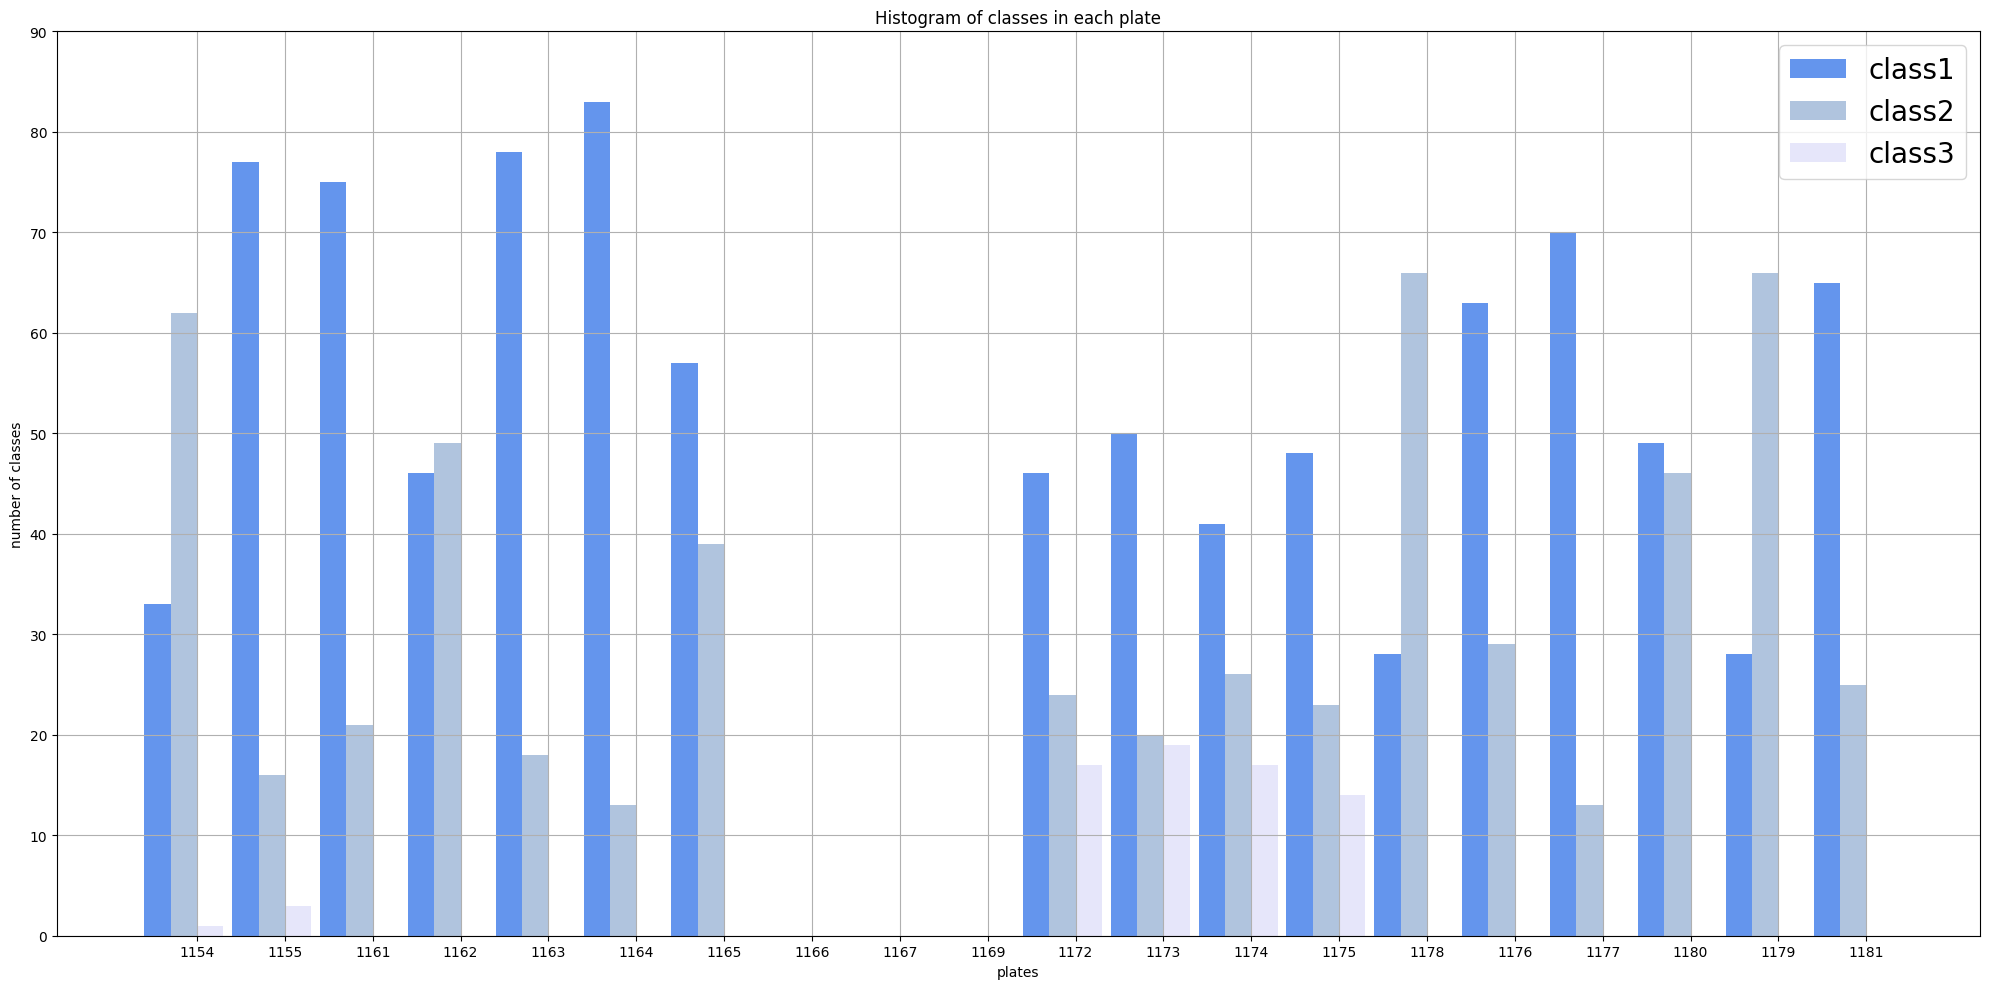

In [ ]:
#import glob
#pathes = glob.glob('/content/drive/My Drive/Fungal-Fungal-interaction/data/wells/*/')
#print(pathes)
# ! pip ininstall matplotlib
# ! pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os


data = pd.read_csv(data_dir + '01_well_data.csv')
plate_names = [str(well) for well in os.listdir(well_dir)]
print(plate_names)
print(type(data['img_paths'][0].split('/')[-2]))

paths, lbls = data['img_paths'], data['labels']

cls_numbers = []
for name in plate_names:
  counter1, counter2, counter3 = 0, 0, 0
  for i, path in enumerate(paths):
    lbl = int(lbls[i])
    plate = path.split('/')[-2]
    if name == plate:
      if lbl==0:
        counter1+=1
      elif lbl==1:
        counter2+=1
      else:
        counter3+=1
  cls_numbers.append([counter1, counter2, counter3])
del data
cls_numbers = np.array(cls_numbers)
# Mode names
print(cls_numbers)
classes = ['class1', 'class2', 'class3']

# Number of models
n_plates = len(plate_names)

# Width of the bars
bar_width = 0.3

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create bars for each mode
colors = ['cornflowerblue', 'lightsteelblue', 'lavender']
for i in range(len(classes)):
    ax.bar(np.arange(n_plates) + i * bar_width, cls_numbers[:, i], width=bar_width, label=classes[i], color=colors[i])

# Set the position of the x ticks
ax.set_xticks(np.arange(n_plates) + bar_width * 1.5)
ax.set_xticklabels(plate_names)
# plt.xticks(np.arange(n_plates) + bar_width * 1.5)
# plt.set_xticklabels(plate_names)
ax.set_ylim(0, 90)
plt.grid()

# Adding labels and title
plt.xlabel('plates')
plt.ylabel('number of classes')


plt.title('Histogram of classes in each plate')

# Adding legend
plt.legend(loc='best', fontsize=20)

# Show plot
plt.tight_layout()

plt.savefig(plot_dir+'plates_distribution.svg', transparent=True, dpi=1200)
plt.show()



In [ ]:
print(plate_names)

['1154', '1155', '1161', '1162', '1163', '1164', '1165', '1166', '1167', '1169', '1172', '1173', '1174', '1175', '1178', '1176', '1177', '1180', '1179', '1181']
